<a href="https://colab.research.google.com/github/leqtr/AI_ML/blob/main/HW2/AI_ML_HW2_GD_base_%D0%9B%D0%B5_%D0%9A%D1%83%D0%B0%D0%BD%D0%B3_%D0%A7%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, lambdify, re, im
np.random.seed(42)

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

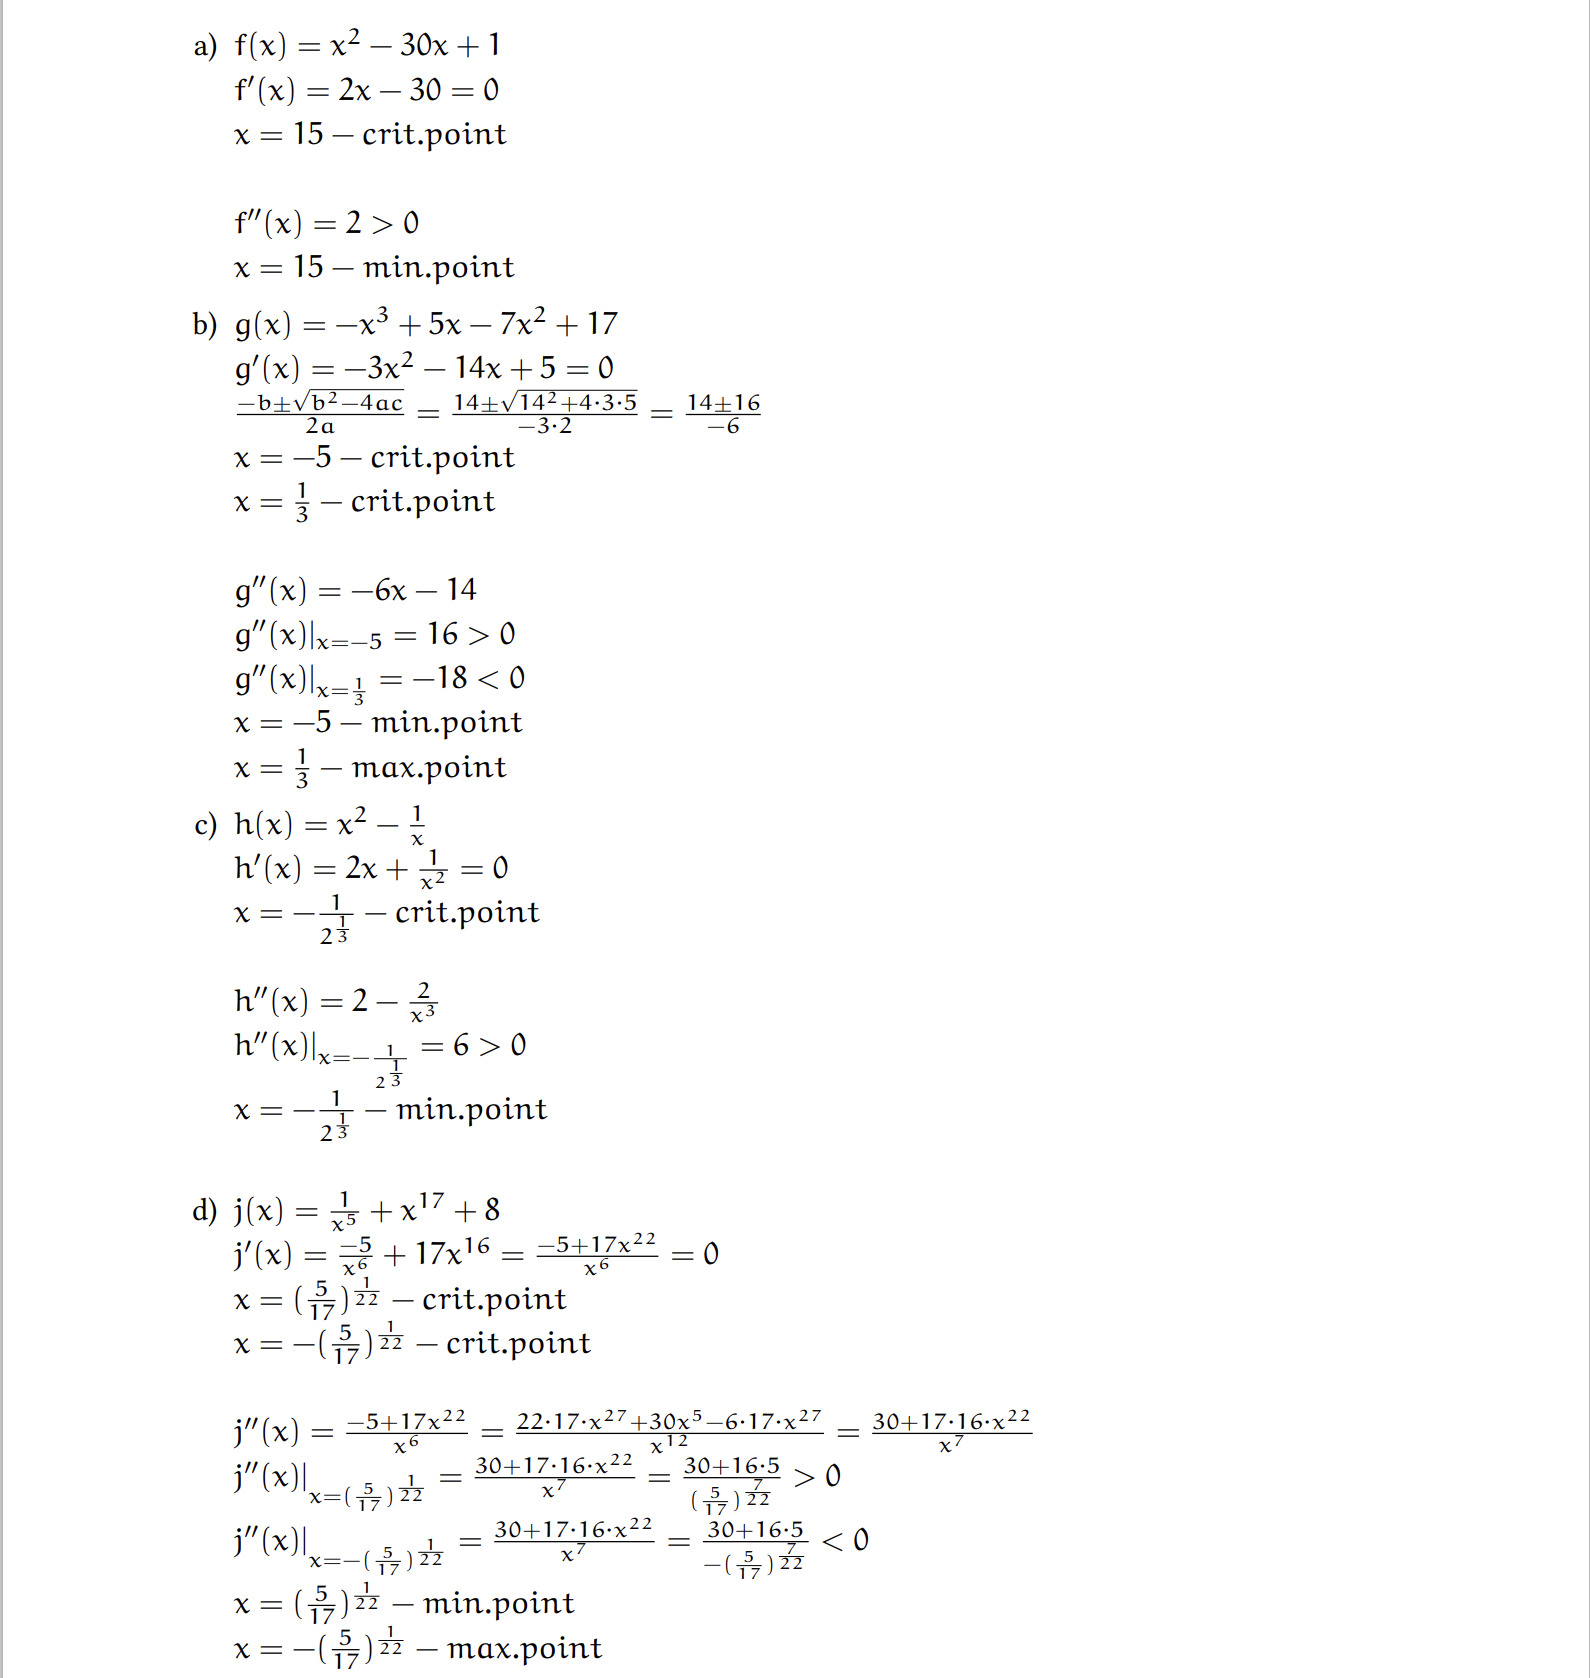

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [90]:
x = symbols('x')
f = x**2 - 30*x + 1
g = -x**3 + 5*x - 7*x**2 + 17
h = x**2 - 1/x
j = 1/x**5 + x**17 + 8
functions = {'f(x)': f, 'g(x)': g, 'h(x)': h, 'j(x)': j}

In [91]:
for func_name, func in functions.items():
  print(f"{func_name}:")
  # f'(x)
  first_derivative = diff(func, x)
  print(f"First derivative: {first_derivative}")
  # f'(x) = 0
  critical_points = solve(first_derivative, x)
  critical_points = [p for p in critical_points if im(p) == 0]
  print(f"Critical points: {critical_points}")
  # f''(x)
  second_derivative = diff(first_derivative, x)
  print(f"Second derivative: {second_derivative}")

  for critical_point in critical_points:
    try:
      second_derivative_value = second_derivative.subs(x, critical_point)
      if second_derivative_value > 0:
        print(f"x = {critical_point} - Minimum point")
      elif second_derivative_value < 0:
        print(f"x = {critical_point} - Maximum point")
      else:
        print(f"x = {critical_point} - More investigation required")
    except:
      print(f'Problems with {critical_point}')
  print()

f(x):
First derivative: 2*x - 30
Critical points: [15]
Second derivative: 2
x = 15 - Minimum point

g(x):
First derivative: -3*x**2 - 14*x + 5
Critical points: [-5, 1/3]
Second derivative: -6*x - 14
x = -5 - Minimum point
x = 1/3 - Maximum point

h(x):
First derivative: 2*x + x**(-2)
Critical points: [-2**(2/3)/2]
Second derivative: 2 - 2/x**3
x = -2**(2/3)/2 - Minimum point

j(x):
First derivative: 17*x**16 - 5/x**6
Critical points: [-17**(21/22)*5**(1/22)/17, 17**(21/22)*5**(1/22)/17]
Second derivative: 272*x**15 + 30/x**7
x = -17**(21/22)*5**(1/22)/17 - Maximum point
x = 17**(21/22)*5**(1/22)/17 - Minimum point



## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

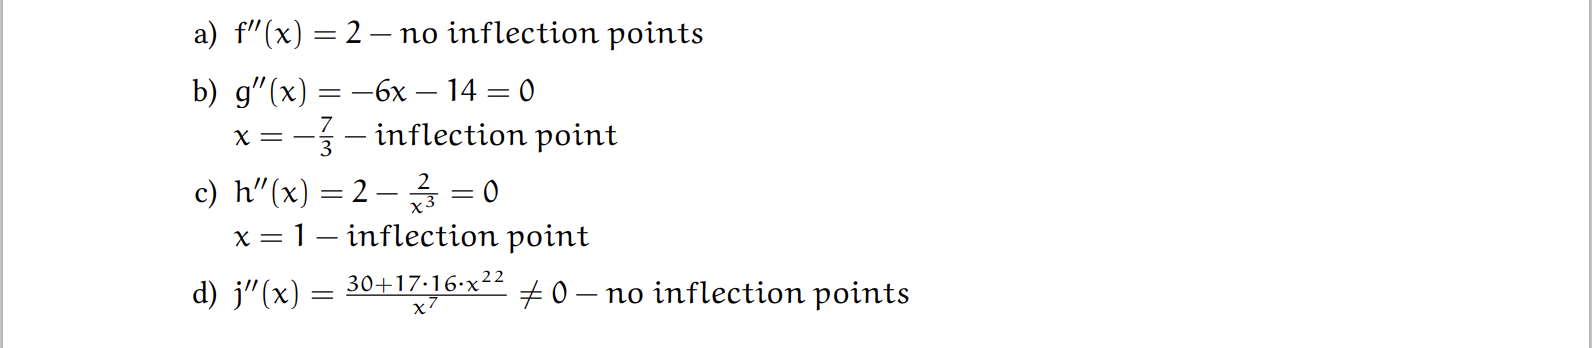

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [92]:
for func_name, func in functions.items():
  print(f"{func_name}:")
  # f''(x)
  second_derivative = diff(diff(func, x), x)
  # f''(x) = 0
  inflection_points = solve(second_derivative, x)
  inflection_points = [p for p in inflection_points if im(p) == 0]
  print(f"Inflection points: {inflection_points}")

f(x):
Inflection points: []
g(x):
Inflection points: [-7/3]
h(x):
Inflection points: [1]
j(x):
Inflection points: []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

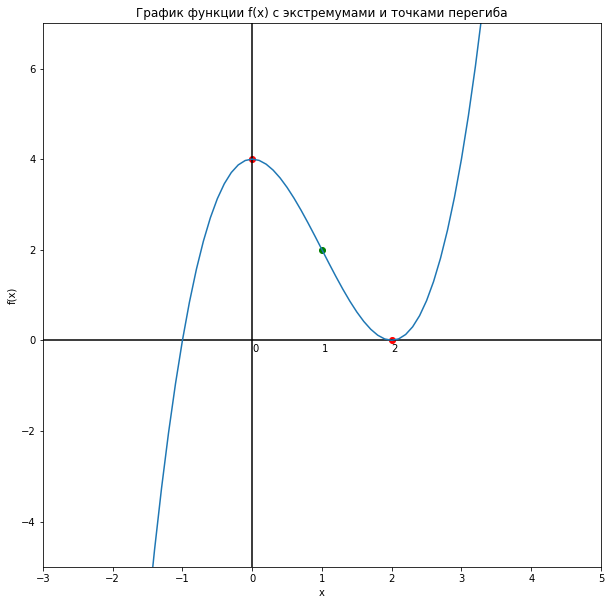

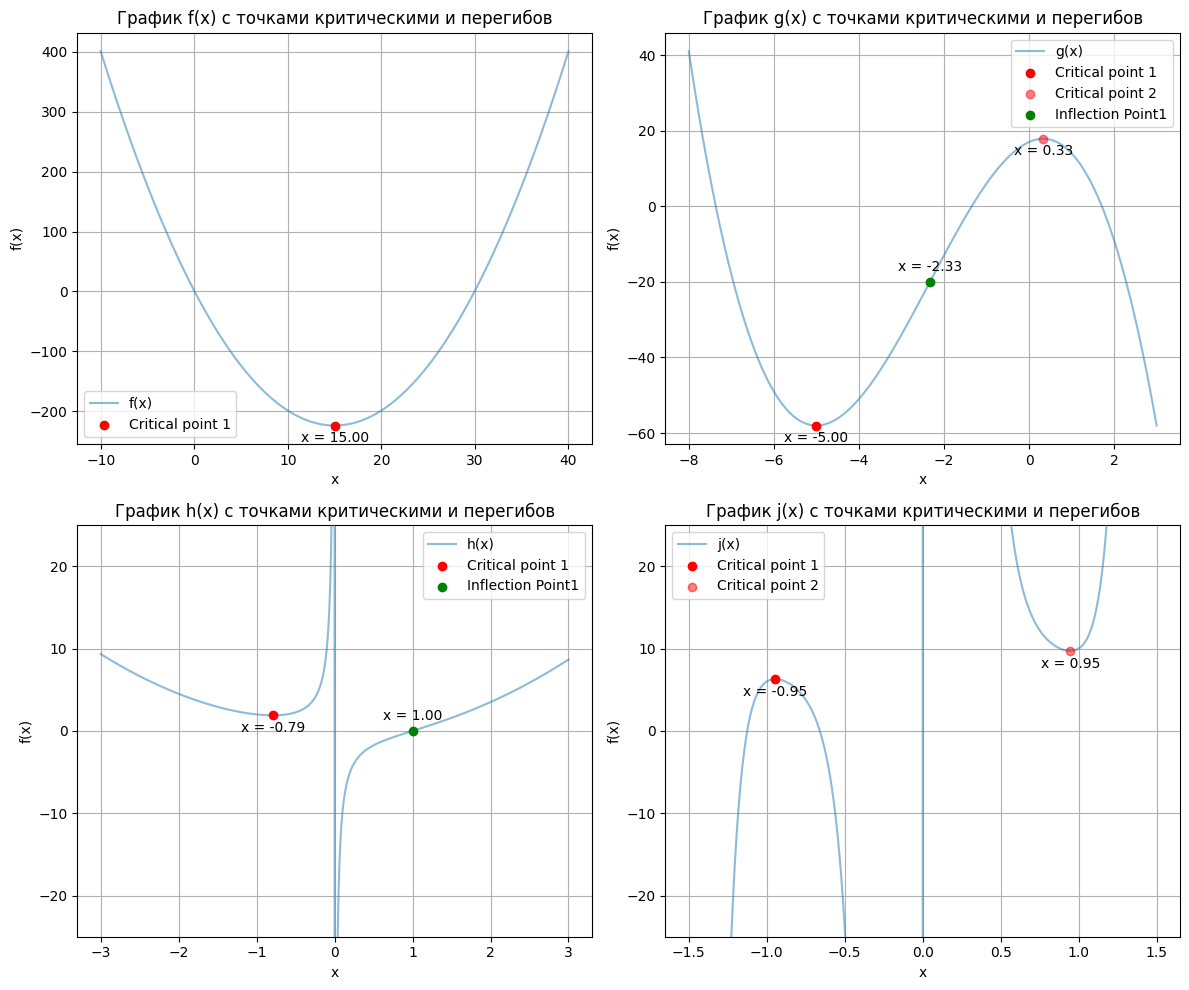

In [93]:
x_borders = {'f(x)': [-10,40], 'g(x)': [-8,3], 'h(x)': [-3,3], 'j(x)': [-1.5,1.5]}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (func_name, func) in enumerate(functions.items()):
  # f'(x)
  first_derivative = diff(func, x)
  # f'(x) = 0
  critical_points = solve(first_derivative, x)
  critical_points = [p for p in critical_points if im(p) == 0]
  # f''(x)
  second_derivative = diff(first_derivative, x)
  # f''(x) = 0
  inflection_points = solve(second_derivative, x)
  inflection_points = [p for p in inflection_points if im(p) == 0]

  func_lambda = lambdify(x, func, 'numpy')
  x_vals = np.linspace(x_borders[func_name][0], x_borders[func_name][1], 1000)
  y_vals = func_lambda(x_vals)

  # plotting
  ax = axes[idx]
  ax.plot(x_vals, y_vals, label=func_name, color='C0', zorder = 3, alpha = 0.5)

  if func_name in ['h(x)','j(x)']:
    ax.set_ylim(-25, 25)

  # critical points
  for i,critical_point in enumerate(critical_points):
      y_critical_point = func_lambda(critical_point)
      ax.scatter([critical_point], [y_critical_point], color='red', label=f'Critical point {i+1}', alpha = (1-i/2), zorder=5)
      ax.annotate(f'x = {critical_point:.2f}', (critical_point, y_critical_point), textcoords="offset points", xytext=(0, -12), ha='center')

  # inflection points
  for i,inflection_point in enumerate(inflection_points):
      y_inflection_point = func_lambda(inflection_point)
      ax.scatter([inflection_point], [y_inflection_point], color='green', label=f'Inflection Point{i+1}', alpha = (1-i/2), zorder=5)
      ax.annotate(f'x = {inflection_point:.2f}', (inflection_point, y_inflection_point), textcoords="offset points", xytext=(0, 8), ha='center')

  ax.set_title(f'График {func_name} с точками критическими и перегибов')
  ax.set_xlabel('x')
  ax.set_ylabel('f(x)')
  ax.legend()
  ax.grid()

plt.tight_layout()
plt.show()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [231]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations, delta, func_name, momentum):
  x_curr = x_start
  # gradient - f'(x)
  func = functions[func_name]
  first_derivative = diff(func, x)

  trace = []
  trace.append(x_curr)

  for i in range(num_iterations):
    first_derivative_point = first_derivative.subs(x, x_curr)
    x_new = x_curr - learning_rate * first_derivative_point
    trace.append(x_new)

    if (abs(x_new - x_curr) < epsilon) or (abs(first_derivative_point) < delta):
      return x_curr, trace

    x_curr = x_new

  return float(x_curr), trace

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [x] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [x] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [x] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [232]:
def find_local_minimum_method(learning_rate, epsilon, num_iterations, delta, func_name,
                                    starting_points,
                                    best_start = None, best_minimum = None, best_trace = None,
                                    method = gradient_descent,momentum = None
                                    ):
  func_lambda = lambdify(x, functions[func_name], 'numpy')
  for x_start in starting_points:
    x_min, trace = method(x_start = x_start,
                          learning_rate = learning_rate,
                          epsilon = epsilon,
                          num_iterations = num_iterations,
                          delta = delta,
                          func_name = func_name,
                          momentum = 0 if momentum is None else momentum)
    print(f"Starting point: {x_start}, Found minimum: {x_min:.2f}")
    try:
      func_val_x_min = float(func_lambda(x_min))
      func_val_best_minimum = float(func_lambda(best_minimum)) if best_minimum is not None else None

      if not np.isnan(func_val_x_min) and np.isfinite(func_val_x_min):
          if best_minimum is None or (
              func_val_best_minimum is not None and
              func_val_x_min < func_val_best_minimum
          ):
              best_minimum = x_min
              best_trace = trace
              best_start = x_start
    except:
      pass
  print(f"\nBest starting point: {best_start}")
  print(f"Best learning rate: {learning_rate}")
  print(f"Local minimum found at x = {best_minimum:.4f}, f(x) = {func_lambda(best_minimum):.4f}")
  return best_start,learning_rate,best_minimum,best_trace

In [233]:
def plot_function_with_minimum_and_descent(func_name, x_range, min_x, min_trace):
  func = functions[func_name]
  func_lambda = lambdify(x, func, 'numpy')
  x_vals = np.linspace(x_range[0], x_range[1], 1000)
  y_vals = func_lambda(x_vals)

  plt.figure(figsize=(10, 6))
  plt.plot(x_vals, y_vals, label=func_name, color='C0', zorder = 3, alpha = 0.5)

  # Mark the minimum point
  min_y = func_lambda(min_x)
  plt.scatter([min_x], [min_y], color='red', label='Local Minimum', zorder=5)
  plt.annotate(f'x = {min_x:.2f}', (min_x, min_y), textcoords="offset points", xytext=(0, 8), ha='center')

  # Plot the trace of gradient descent
  trace_y = [func_lambda(val) for val in min_trace]
  plt.scatter(min_trace, trace_y, color='green', label='Gradient Descent Path', zorder=4)

  # Customize plot
  if func_name in ['h(x)','j(x)']:
    plt.ylim(-25, 25)
  plt.title('Function and Local Minimum')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
  plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
  plt.legend()
  plt.grid()
  plt.show()

In [234]:
# General params
epsilon = 1e-6
delta = 1e-6
num_iterations = 1000

f(x)
Starting point: 308065.5395041023, Found minimum: 15.00
Starting point: -391633.5674217911, Found minimum: 15.00
Starting point: 269141.94124510733, Found minimum: 15.00
Starting point: -343177.2754974105, Found minimum: 15.00
Starting point: 621586.8898560508, Found minimum: 15.00
Starting point: -369595.336043634, Found minimum: 15.00
Starting point: 377115.3939021865, Found minimum: 15.00
Starting point: -29247.813684978355, Found minimum: 15.00
Starting point: 1126065.2507721682, Found minimum: 15.00
Starting point: -51378.72358848624, Found minimum: 15.00
Starting point: -1773017.4682068813, Found minimum: 15.00
Starting point: 1261936.5007139917, Found minimum: 15.00
Starting point: -905717.300862619, Found minimum: 15.00
Starting point: -653751.3386488198, Found minimum: 15.00
Starting point: -595646.2940434921, Found minimum: 15.00
Starting point: 1374453.0931708172, Found minimum: 15.00
Starting point: -2135659.2139786957, Found minimum: 15.00
Starting point: 3137763.5336

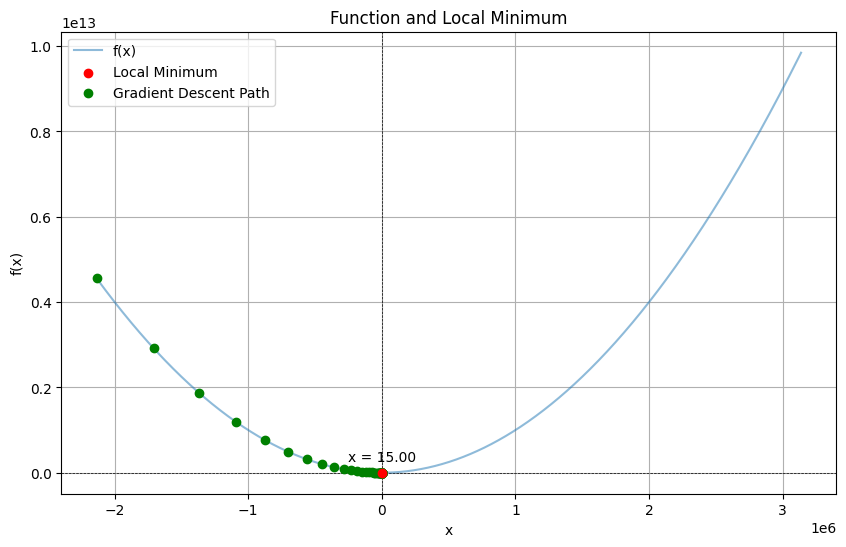

In [236]:
# f(x)
func_name = 'f(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=15, scale=1e6, size=20)
# симулируем генерацию случайной стартовой точки на всем R

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent,
                                                                             momentum = None
                                                                             )

# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

g(x)
Starting point: -2.5641018830453084, Found minimum: -5.00
Starting point: -4.74163503744347, Found minimum: -5.00
Starting point: -9.772720780818824, Found minimum: -5.00
Starting point: 0.1521361890831492, Found minimum: -5.00
Starting point: -0.28946830872270013, Found minimum: -5.00
Starting point: -3.34398267135464, Found minimum: -5.00
Starting point: -2.2990278483253843, Found minimum: -5.00
Starting point: -0.9521823468877018, Found minimum: -5.00
Starting point: -7.1876375706596285, Found minimum: -5.00
Starting point: -4.087158032038884, Found minimum: -5.00
Starting point: -0.11720596113451887, Found minimum: -5.00
Starting point: -6.262868269507749, Found minimum: -5.00
Starting point: -1.6193262035001121, Found minimum: -5.00
Starting point: -6.569745413870216, Found minimum: -5.00
Starting point: -1.100710052699421, Found minimum: -5.00
Starting point: -2.606924446892451, Found minimum: -5.00
Starting point: -7.345395447716529, Found minimum: -5.00
Starting point: 0.9

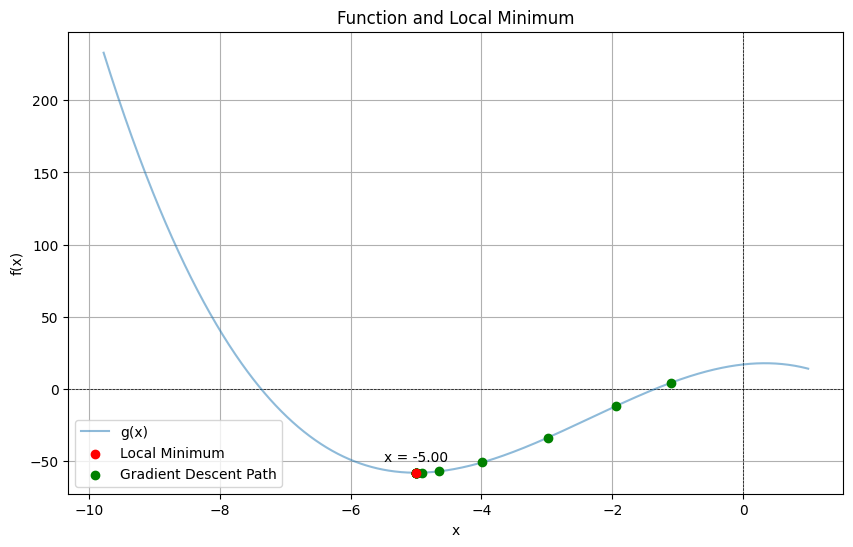

In [203]:
# g(x)
func_name = 'g(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.05
starting_points = np.random.normal(loc=-2.5, scale=3, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)
# + легко уйти в бесконечности
# функция отрисовки графика специально написана так, чтобы минимум в виде бесконечности игнорировать
# и рисовать только локальные мины
# найдет и отрисует локальный мин, если хотя бы из 1 стартовой точки мы дошли (почти дошли)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent,
                                                                             momentum = None
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

h(x)
Starting point: 0.4011383944618857, Found minimum: -0.79
Starting point: 2.2972746988574304, Found minimum: -0.79
Starting point: -2.031643637956794, Found minimum: -0.79
Starting point: 0.1233596996959433, Found minimum: -0.79
Starting point: 0.8576330006611459, Found minimum: -0.79
Starting point: 1.3862112145262881, Found minimum: -0.79
Starting point: 0.3528831105544504, Found minimum: -0.79
Starting point: -0.7340556781666446, Found minimum: -0.79
Starting point: -1.6551804412974394, Found minimum: -0.79
Starting point: 0.1722877660927495, Found minimum: -0.79
Starting point: -2.144278023971214, Found minimum: -0.79
Starting point: -5.842700966989215, Found minimum: -0.79
Starting point: 0.8731196083153356, Found minimum: -0.79
Starting point: 1.8078696821723905, Found minimum: -0.79
Starting point: -4.725864871083677, Found minimum: -0.79
Starting point: -2.019461409419875, Found minimum: -0.79
Starting point: 1.2383085220103955, Found minimum: -0.79
Starting point: 4.114990

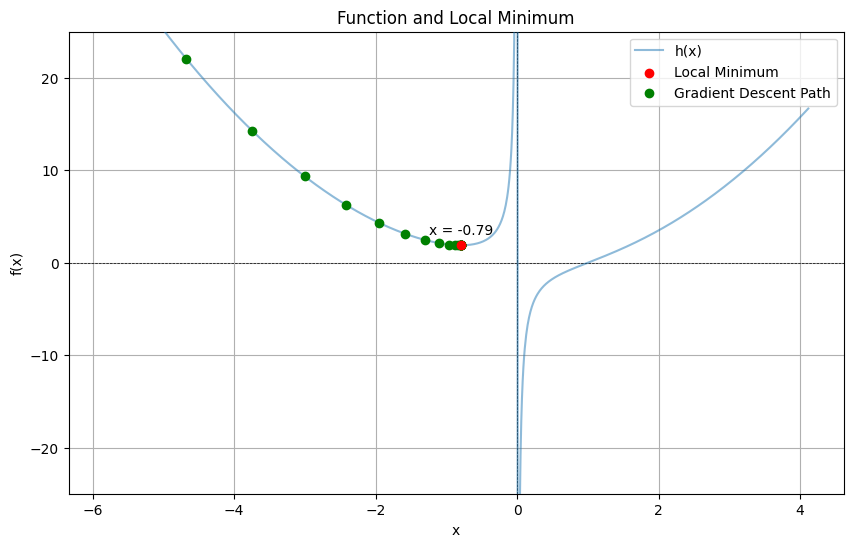

In [204]:
# h(x)
func_name = 'h(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=0, scale=2, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent,
                                                                             momentum = None
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

j(x)
Starting point: -0.11145795693703198, Found minimum: -inf
Starting point: 1.246504778432005, Found minimum: 0.95
Starting point: 1.498221748496785, Found minimum: -inf
Starting point: 2.1401490385212663, Found minimum: -inf
Starting point: 2.5805406865683738, Found minimum: -inf
Starting point: -0.015094191827868642, Found minimum: -inf
Starting point: 0.18914248878966178, Found minimum: -inf
Starting point: -0.25757785891461626, Found minimum: -inf
Starting point: 0.7659801408930187, Found minimum: 0.95
Starting point: 1.4663583744463344, Found minimum: -inf
Starting point: 1.9873345165891019, Found minimum: -inf
Starting point: 0.9240489763574773, Found minimum: 0.95
Starting point: 0.6801524767451561, Found minimum: 0.95
Starting point: 1.1517579922487404, Found minimum: 0.95
Starting point: 0.16485709836997697, Found minimum: -inf
Starting point: 3.0895387216947734, Found minimum: -inf
Starting point: -0.6076610271180587, Found minimum: -inf
Starting point: 1.1847405788957244,

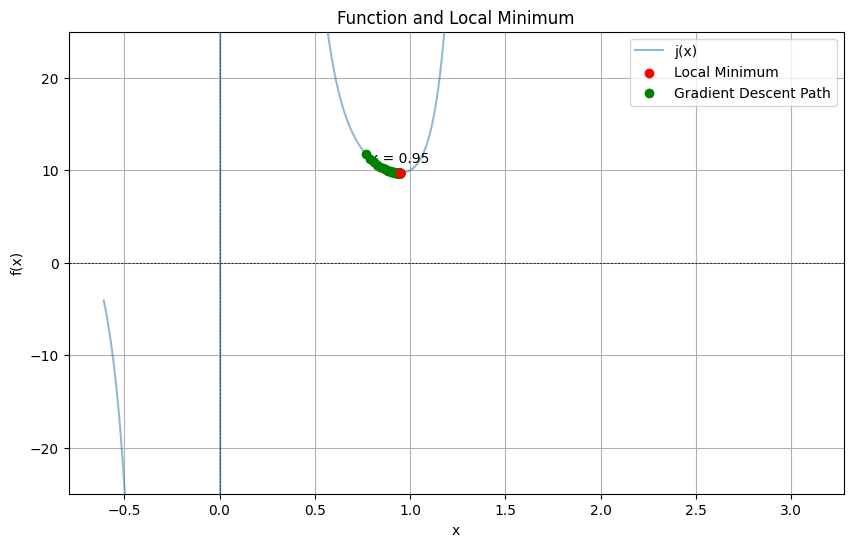

CPU times: user 29.7 s, sys: 274 ms, total: 30 s
Wall time: 31 s


In [249]:
%%time
# j(x)
func_name = 'j(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.001
starting_points = np.random.normal(loc=1, scale=1, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)
# функция отрисовки графика специально написана так, чтобы минимум в виде бесконечности игнорировать
# и рисовать только локальные мины
# найдет и отрисует локальный мин, если хотя бы из 1 стартовой точки мы дошли (почти дошли)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent,
                                                                             momentum = None
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

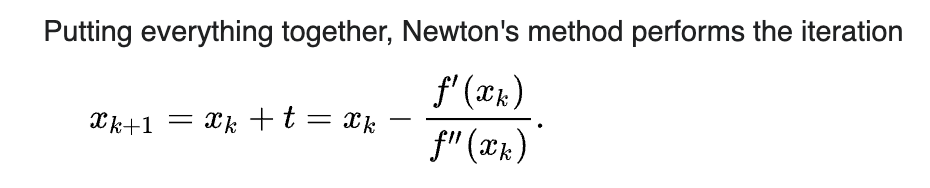

In [ ]:
# def gradient_descent(x_start, learning_rate, epsilon, num_iterations, delta, func_name, momentum):
#   x_curr = x_start
#   # gradient - f'(x)
#   func = functions[func_name]
#   first_derivative = diff(func, x)

#   trace = []
#   trace.append(x_curr)

#   for i in range(num_iterations):
#     first_derivative_point = first_derivative.subs(x, x_curr)
#     x_new = x_curr - learning_rate * first_derivative_point
#     trace.append(x_new)

#     if (abs(x_new - x_curr) < epsilon) or (abs(first_derivative_point) < delta):
#       return x_curr, trace

#     x_curr = x_new

#   return float(x_curr), trace

In [237]:
# Newton's method for finding a local minimum
def newton_local_min(x_start, learning_rate, epsilon, num_iterations, delta, func_name, momentum):
  x_curr = x_start
  func = functions[func_name]
  first_derivative = diff(func, x)
  second_derivative = diff(first_derivative, x)

  trace = []
  trace.append(x_curr)

  for i in range(num_iterations):
      first_derivative_point = float(first_derivative.subs(x, x_curr))
      second_derivative_point = float(second_derivative.subs(x, x_curr))

      if second_derivative_point == 0:
          raise ValueError(f"Second derivative = 0 at x = {x_curr}.")

      x_new = x_curr - first_derivative_point / second_derivative_point
      trace.append(x_new)

      if (abs(x_new - x_curr) < epsilon) or (abs(first_derivative_point) < delta):
        return x_curr, trace

      x_curr = x_new

  return float(x_curr), trace

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

f(x)
Starting point: -971641.734541286, Found minimum: 15.00
Starting point: -1379603.1647889304, Found minimum: 15.00
Starting point: -626702.2245899652, Found minimum: 15.00
Starting point: 862408.4723827587, Found minimum: 15.00
Starting point: 953140.0453760867, Found minimum: 15.00
Starting point: 513100.420097293, Found minimum: 15.00
Starting point: 725110.7868479971, Found minimum: 15.00
Starting point: 516193.2871149584, Found minimum: 15.00
Starting point: -641466.5952229522, Found minimum: 15.00
Starting point: 431937.54467394063, Found minimum: 15.00
Starting point: 800424.5252276823, Found minimum: 15.00
Starting point: 754306.3298135743, Found minimum: 15.00
Starting point: 1188928.371474643, Found minimum: 15.00
Starting point: 708318.8472010638, Found minimum: 15.00
Starting point: 351463.2075415829, Found minimum: 15.00
Starting point: 1070165.2383164275, Found minimum: 15.00
Starting point: -26506.259249060062, Found minimum: 15.00
Starting point: -881859.6512277178, 

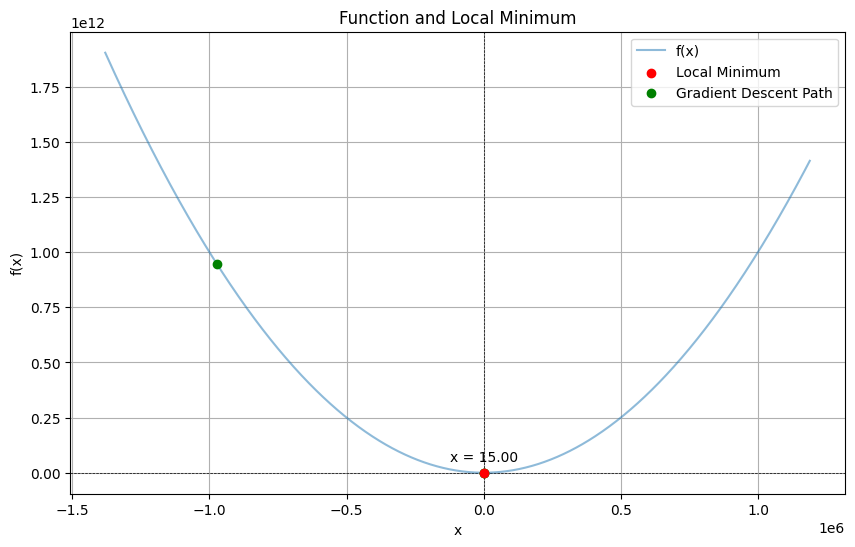

In [239]:
# f(x)
func_name = 'f(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=15, scale=1e6, size=20)
# симулируем генерацию случайной стартовой точки на всем R

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = newton_local_min,
                                                                             momentum = None
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

g(x)
Starting point: -1.2888097289901717, Found minimum: 0.33
Starting point: -2.5725868191727486, Found minimum: -5.00
Starting point: -5.211105582190385, Found minimum: -5.00
Starting point: -1.526922154835191, Found minimum: 0.33
Starting point: -6.037119373479408, Found minimum: -5.00
Starting point: 1.0630381653846914, Found minimum: 0.33
Starting point: -3.893851891895179, Found minimum: -5.00
Starting point: -1.896521032381482, Found minimum: 0.33
Starting point: -1.6501363853615736, Found minimum: 0.33
Starting point: -3.276714921112232, Found minimum: -5.00
Starting point: -0.7399185955741758, Found minimum: 0.33
Starting point: -3.924710969867573, Found minimum: -5.00
Starting point: 0.1138918923717327, Found minimum: 0.33
Starting point: -6.537939040740246, Found minimum: -5.00
Starting point: -2.1208612613607647, Found minimum: 0.33
Starting point: 3.3167869971748543, Found minimum: 0.33
Starting point: -5.500993973816724, Found minimum: -5.00
Starting point: -4.53323491157

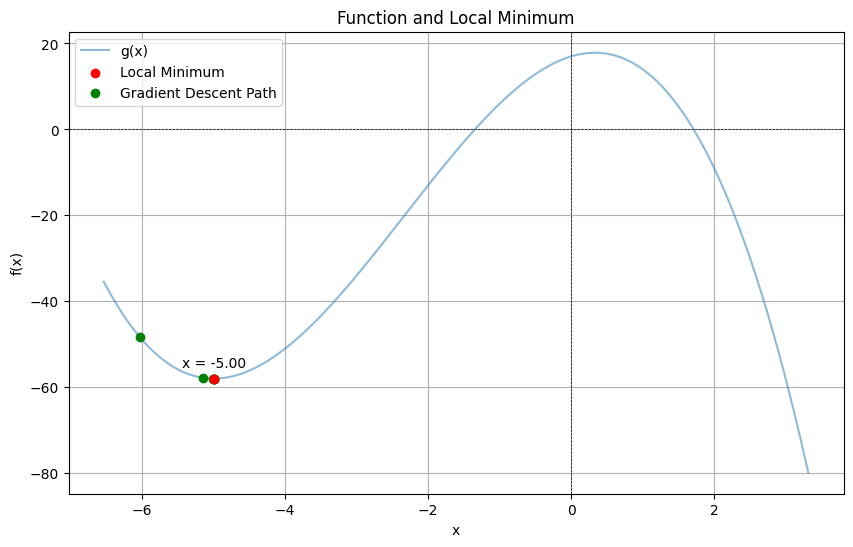

In [210]:
# g(x)
func_name = 'g(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.05
starting_points = np.random.normal(loc=-2.5, scale=3, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)
# + легко уйти в бесконечности
# функция отрисовки графика специально написана так, чтобы минимум в виде бесконечности игнорировать
# и рисовать только локальные мины
# найдет и отрисует локальный мин, если хотя бы из 1 стартовой точки мы дошли (почти дошли)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = newton_local_min,
                                                                             momentum = None
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

h(x)
Starting point: 0.7012601985471184, Found minimum: -0.79
Starting point: 0.978374260295327, Found minimum: -0.79
Starting point: 1.2694429371235398, Found minimum: -0.79
Starting point: 2.2193996839124464, Found minimum: -0.79
Starting point: 0.8196373138570251, Found minimum: -0.79
Starting point: -0.4825153092370849, Found minimum: -0.79
Starting point: 1.3451474024054626, Found minimum: -0.79
Starting point: 3.7997638697904312, Found minimum: -0.79
Starting point: -0.2652674927651471, Found minimum: -0.79
Starting point: -1.949058609341283, Found minimum: -0.79
Starting point: 2.2141613385739456, Found minimum: -0.79
Starting point: -0.24076232790719648, Found minimum: -0.79
Starting point: -4.345339092028072, Found minimum: -0.79
Starting point: 1.6948433543008432, Found minimum: -0.79
Starting point: -1.0706563719078455, Found minimum: -0.79
Starting point: -0.18106656460832155, Found minimum: -0.79
Starting point: 0.6639606611380291, Found minimum: -0.79
Starting point: 0.38

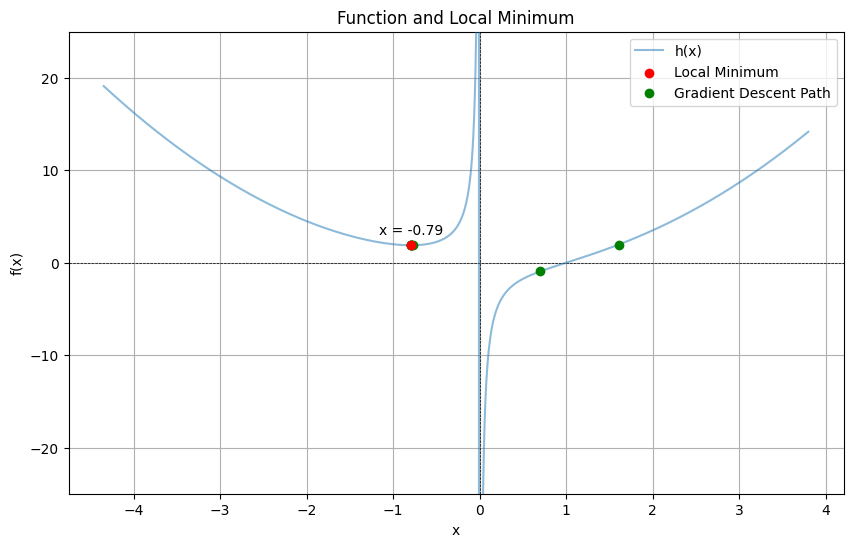

In [211]:
# h(x)
func_name = 'h(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=0, scale=2, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = newton_local_min,
                                                                             momentum = None
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

j(x)
Starting point: 1.0823804206182583, Found minimum: 0.95
Starting point: 1.025443850928009, Found minimum: 0.95
Starting point: 1.086670832185204, Found minimum: 0.95
Starting point: 1.12197659895425, Found minimum: 0.95
Starting point: 0.8883988726825974, Found minimum: 0.95
Starting point: 1.7449317193010412, Found minimum: 0.95
Starting point: 0.19954801076174222, Found minimum: 0.95
Starting point: 0.585751487609877, Found minimum: 0.95
Starting point: 0.9483726199254763, Found minimum: 0.95
Starting point: 0.17840559442291637, Found minimum: 0.95
Starting point: 0.9120727977839644, Found minimum: 0.95
Starting point: 1.8307350828640092, Found minimum: 0.95
Starting point: 1.010443244147981, Found minimum: 0.95
Starting point: 1.1153504528593416, Found minimum: 0.95
Starting point: 0.3699176174137099, Found minimum: 0.95
Starting point: 0.6918192959802613, Found minimum: 0.95
Starting point: 0.8124018098380315, Found minimum: 0.95
Starting point: 0.841142451621883, Found minimu

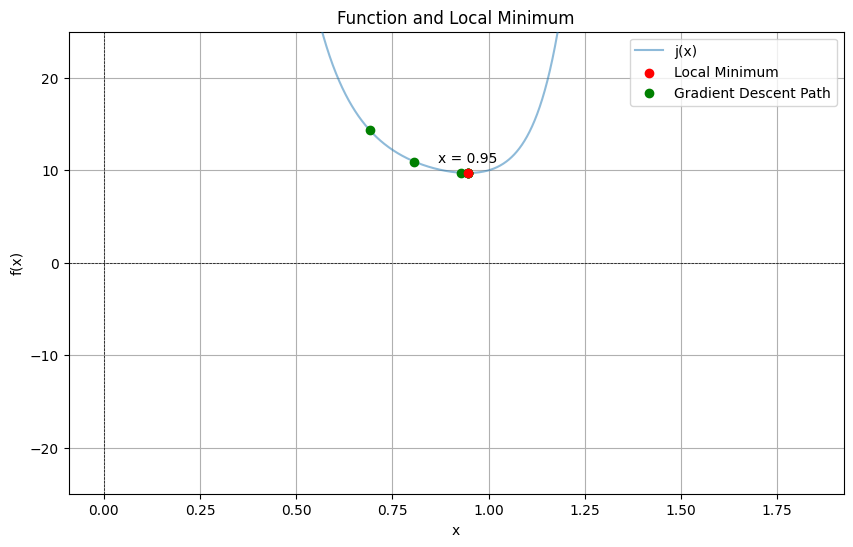

CPU times: user 974 ms, sys: 66.5 ms, total: 1.04 s
Wall time: 1.68 s


In [248]:
%%time
# j(x)
func_name = 'j(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.001
starting_points = np.random.normal(loc=1, scale=0.5, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)
# функция отрисовки графика специально написана так, чтобы минимум в виде бесконечности игнорировать
# и рисовать только локальные мины
# найдет и отрисует локальный мин, если хотя бы из 1 стартовой точки мы дошли (почти дошли)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = newton_local_min,
                                                                             momentum = 0
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# def gradient_descent(x_start, learning_rate, epsilon, num_iterations, delta, func_name, momentum):
#   x_curr = x_start
#   # gradient - f'(x)
#   func = functions[func_name]
#   first_derivative = diff(func, x)

#   trace = []
#   trace.append(x_curr)

#   for i in range(num_iterations):
#     first_derivative_point = first_derivative.subs(x, x_curr)
#     x_new = x_curr - learning_rate * first_derivative_point
#     trace.append(x_new)

#     if (abs(x_new - x_curr) < epsilon) or (abs(first_derivative_point) < delta):
#       return x_curr, trace

#     x_curr = x_new

#   return float(x_curr), trace

In [240]:
# Momentum Gradient Descent
def gradient_descent_momentum(x_start, learning_rate, epsilon, num_iterations, delta, func_name, momentum):
  x_curr = x_start
  # gradient - f'(x)
  func = functions[func_name]
  first_derivative = diff(func, x)

  trace = []
  trace.append(x_curr)

  # скорость
  velocity = 0

  for i in range(num_iterations):
    first_derivative_point = first_derivative.subs(x, x_curr)
    vel_mom = momentum * velocity
    x_new = x_curr - learning_rate * first_derivative_point + vel_mom
    trace.append(x_new)

    if (abs(x_new - x_curr) < epsilon) or (abs(first_derivative_point) < delta):
      return x_curr, trace

    x_curr = x_new

  return float(x_curr), trace

f(x)
Starting point: 105909.45311523424, Found minimum: 15.00
Starting point: 584427.9804724843, Found minimum: 15.00
Starting point: 1976455.5845154854, Found minimum: 15.00
Starting point: -1564226.6117110513, Found minimum: 15.00
Starting point: 1617227.574968624, Found minimum: 15.00
Starting point: 104370.93752321292, Found minimum: 15.00
Starting point: -898769.0483231281, Found minimum: 15.00
Starting point: -1330298.6257389898, Found minimum: 15.00
Starting point: -189105.3907770335, Found minimum: 15.00
Starting point: 921665.1119244593, Found minimum: 15.00
Starting point: -127534.12037753421, Found minimum: 15.00
Starting point: 1511169.9302473476, Found minimum: 15.00
Starting point: -1451160.690051559, Found minimum: 15.00
Starting point: -12073.947846054562, Found minimum: 15.00
Starting point: -1252378.444413119, Found minimum: 15.00
Starting point: 363646.8826249679, Found minimum: 15.00
Starting point: 886902.3900973003, Found minimum: 15.00
Starting point: -420746.793

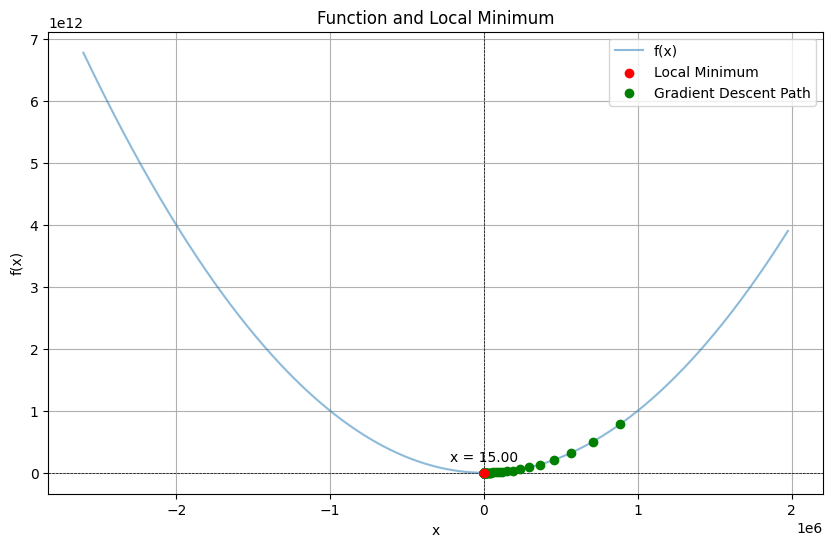

In [253]:
# f(x)
func_name = 'f(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=15, scale=1e6, size=20)
# симулируем генерацию случайной стартовой точки на всем R

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent_momentum,
                                                                             momentum = 0.9
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

g(x)
Starting point: -3.5750204560636667, Found minimum: -5.00
Starting point: -4.442625416905478, Found minimum: -5.00
Starting point: -0.2674240855001897, Found minimum: -5.00
Starting point: -3.043672519654309, Found minimum: -5.00
Starting point: -4.448119114964278, Found minimum: -5.00
Starting point: 1.463912096819036, Found minimum: inf
Starting point: 1.7588090135409118, Found minimum: inf
Starting point: -4.301270697216116, Found minimum: -5.00
Starting point: -8.099619854081848, Found minimum: -5.00
Starting point: 0.5225410695107664, Found minimum: inf
Starting point: -4.553889477280012, Found minimum: -5.00
Starting point: -0.12812320251169407, Found minimum: -5.00
Starting point: -8.410311453135506, Found minimum: -5.00
Starting point: 0.1777920148979275, Found minimum: -5.00
Starting point: -6.133515787842343, Found minimum: -5.00
Starting point: -0.3077076428004264, Found minimum: -5.00
Starting point: -2.4571807964906975, Found minimum: -5.00
Starting point: -5.36181825

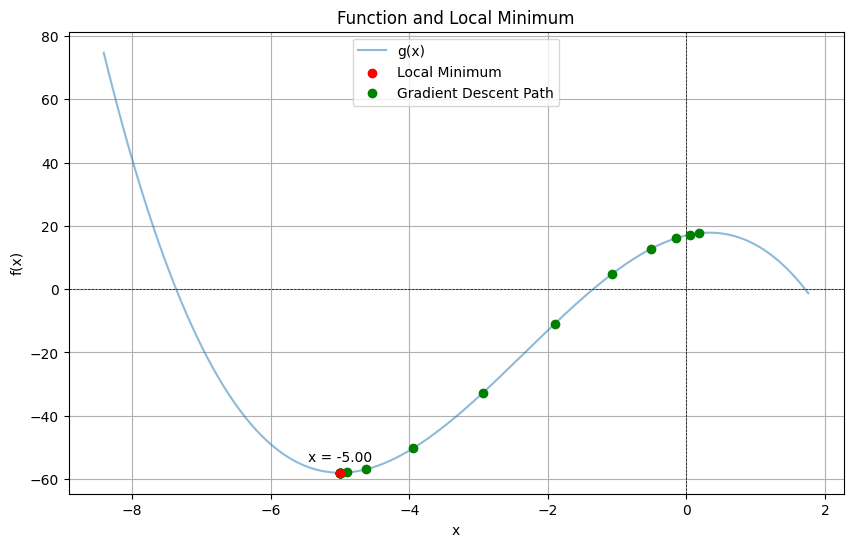

In [252]:
# g(x)
func_name = 'g(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.05
starting_points = np.random.normal(loc=-2.5, scale=3, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)
# + легко уйти в бесконечности
# функция отрисовки графика специально написана так, чтобы минимум в виде бесконечности игнорировать
# и рисовать только локальные мины
# найдет и отрисует локальный мин, если хотя бы из 1 стартовой точки мы дошли (почти дошли)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent_momentum,
                                                                             momentum = 0.9
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

h(x)
Starting point: 0.873477103467019, Found minimum: -0.79
Starting point: 0.8085895099233953, Found minimum: -0.79
Starting point: 2.471564383644308, Found minimum: -0.79
Starting point: -2.1421073592980977, Found minimum: -0.79
Starting point: 1.3604322109008988, Found minimum: -0.79
Starting point: 2.38501502495595, Found minimum: -0.79
Starting point: -3.5571751680130337, Found minimum: -0.79
Starting point: 0.6393036518379545, Found minimum: -0.79
Starting point: -1.008359662015343, Found minimum: -0.79
Starting point: -0.16304534620329178, Found minimum: -0.79
Starting point: 0.6953529670766727, Found minimum: -0.79
Starting point: -0.9744571282271046, Found minimum: -0.79
Starting point: -1.3514161583232236, Found minimum: -0.79
Starting point: 0.0683048349760492, Found minimum: -0.79
Starting point: -2.1744918777256053, Found minimum: -0.79
Starting point: -2.171650257770371, Found minimum: -0.79
Starting point: 1.3587465659130067, Found minimum: -0.79
Starting point: -2.2975

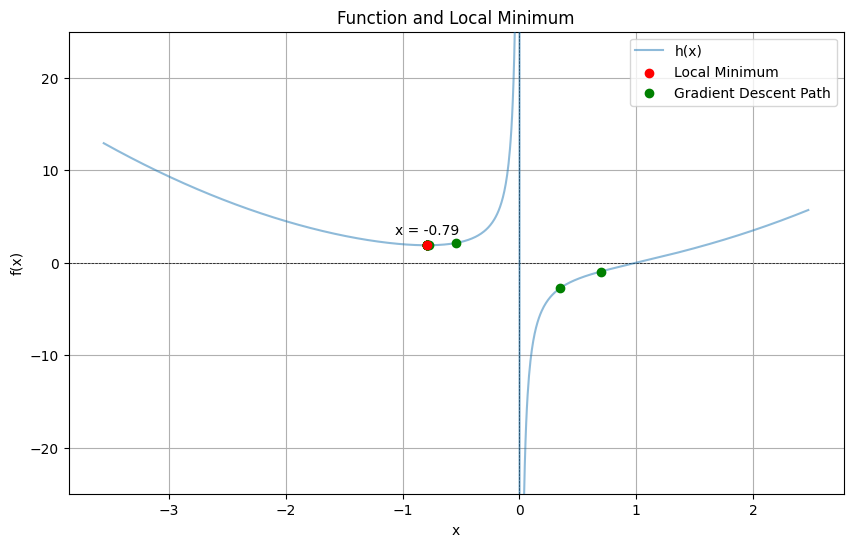

In [254]:
# h(x)
func_name = 'h(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=0, scale=2, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent_momentum,
                                                                             momentum = 0.9
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

j(x)
Starting point: 0.13709663560470164, Found minimum: -inf
Starting point: 0.6612176738321724, Found minimum: 0.95
Starting point: 1.5970547015236862, Found minimum: -inf
Starting point: 0.5094172344301592, Found minimum: 0.95
Starting point: 0.7677978688453062, Found minimum: 0.95
Starting point: 1.2310304466259483, Found minimum: 0.95
Starting point: 1.3916952546412977, Found minimum: -inf
Starting point: 0.8742305569777522, Found minimum: 0.95
Starting point: 0.7012449026541792, Found minimum: 0.95
Starting point: 1.711184930849254, Found minimum: -inf
Starting point: 1.8694498318987893, Found minimum: -inf
Starting point: 1.4894290253908977, Found minimum: -inf
Starting point: 1.0426590712825121, Found minimum: 0.95
Starting point: 0.5958671391795368, Found minimum: 0.95
Starting point: 0.5847777967217174, Found minimum: 0.95
Starting point: 1.2612570526328788, Found minimum: 0.95
Starting point: 1.2091991104443418, Found minimum: 0.95
Starting point: 1.7007992964732148, Found m

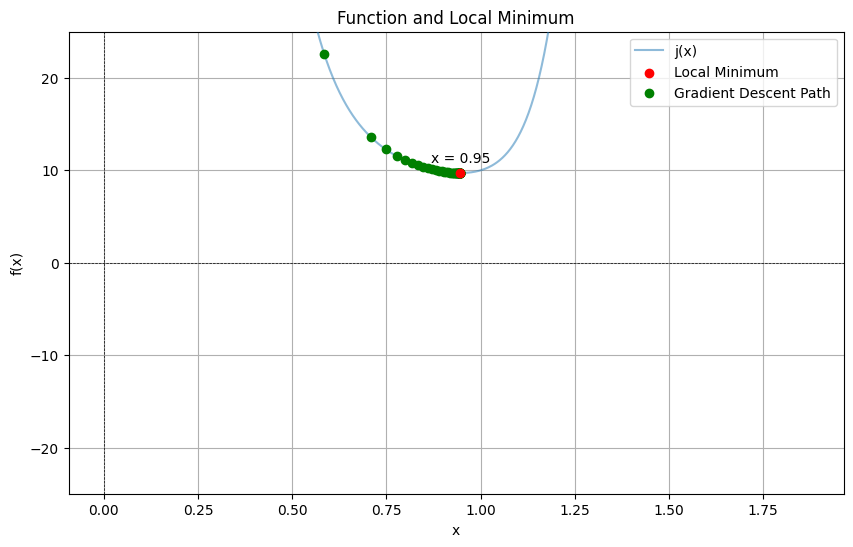

CPU times: user 21.5 s, sys: 165 ms, total: 21.7 s
Wall time: 21.8 s


In [255]:
# j(x)
%%time
func_name = 'j(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.001
starting_points = np.random.normal(loc=1, scale=0.5, size=20)
# (ограничиваем область определения, так как масштаб вылияет на отображение графика, где локмин)
# функция отрисовки графика специально написана так, чтобы минимум в виде бесконечности игнорировать
# и рисовать только локальные мины
# найдет и отрисует локальный мин, если хотя бы из 1 стартовой точки мы дошли (почти дошли)

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent_momentum,
                                                                             momentum = 0.9
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

- для f(x) не имеет смысла, там минимум всегда находится любым методом из любой точки
- для более нетривиальных g,h,j(x) Momentum GD, кажется, не решает проблему - то есть, расширив область определения поиск минимума, либо улетает в -бесконечность, либо сходится также, как и другие методы (всм находит рано или поздно)
- но Momentum GD работает быстрее обычного GD (требует меньше итераций)

П.с.
Возможно, я не слишком понял задание..

In [257]:
# g(x)
func_name = 'g(x)'
func_lambda = lambdify(x, functions[func_name], 'numpy')
learning_rate = 0.1
starting_points = np.random.normal(loc=15, scale=1e6, size=20)
# симулируем генерацию случайной стартовой точки на всем R

print(func_name)
best_start,learning_rate,best_minimum,best_trace = find_local_minimum_method(learning_rate=learning_rate,
                                                                             epsilon=epsilon,
                                                                             num_iterations=num_iterations,
                                                                             delta=delta,
                                                                             func_name=func_name,
                                                                             starting_points=starting_points,
                                                                             best_start = None,
                                                                             best_minimum = None,
                                                                             best_trace = None,
                                                                             method = gradient_descent_momentum,
                                                                             momentum = 0.9
                                                                             )
# Plot
plot_function_with_minimum_and_descent(func_name,
                                      x_range = [min(starting_points),max(starting_points)],
                                      min_x = best_minimum,
                                      min_trace = best_trace)

g(x)
Starting point: 439516.2306202264, Found minimum: inf
Starting point: 778951.503512114, Found minimum: inf
Starting point: 457787.86615188577, Found minimum: inf
Starting point: 1674507.4333475372, Found minimum: inf
Starting point: -5581.018829046555, Found minimum: inf
Starting point: 668756.6555925127, Found minimum: inf
Starting point: -1091685.8761393144, Found minimum: inf
Starting point: -387084.702474401, Found minimum: inf
Starting point: 695552.7575657775, Found minimum: inf
Starting point: 849117.1107431441, Found minimum: inf
Starting point: -293951.9476641822, Found minimum: inf
Starting point: -71584.25185806683, Found minimum: inf
Starting point: -1517858.7466808094, Found minimum: inf
Starting point: -357014.20080660935, Found minimum: inf
Starting point: 890398.1635197862, Found minimum: inf
Starting point: 575220.0161065663, Found minimum: inf
Starting point: 500680.7213812097, Found minimum: inf
Starting point: 49788.68718096008, Found minimum: inf
Starting poin

TypeError: unsupported format string passed to NoneType.__format__

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

Предположу, что это кот Алены Голубович